Link to GitHub Repository: https://github.com/silvermolecule/EDA-DA-1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Gunnels.csv")

In [3]:
sns.set(style="whitegrid")

In [4]:
df.drop(['rownames'], axis = 1, inplace = True)

In [5]:
df.head()

Gunnel  Time  Fromlow  Slope   Rw  Amphiso  Subst  Pool  Water  Cobble
0       0   786      190     10  0.1        0      3     0      0       0
1       0   794      182     10  0.0        0      3     0      0       0
2       0   798      178     20  0.0        0      1     0      0       0
3       0   800      176     70  0.3        0      1     0      1       0
4       0   804      172     40  0.3        0      1     0      1       0

Feature Description to get a better understanding

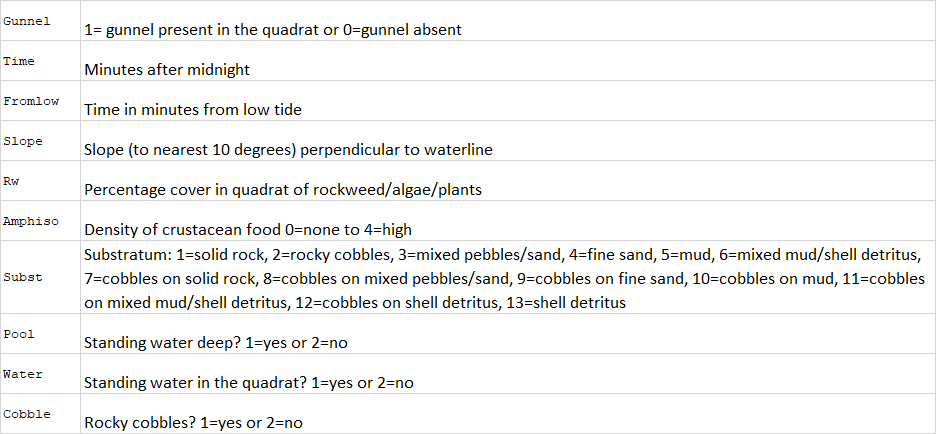

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Gunnel   1592 non-null   int64  
 1   Time     1592 non-null   int64  
 2   Fromlow  1592 non-null   int64  
 3   Slope    1592 non-null   int64  
 4   Rw       1592 non-null   float64
 5   Amphiso  1592 non-null   int64  
 6   Subst    1592 non-null   int64  
 7   Pool     1592 non-null   int64  
 8   Water    1592 non-null   int64  
 9   Cobble   1592 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 124.5 KB


In [7]:
df.describe()

Gunnel         Time      Fromlow        Slope           Rw  \
count  1592.000000  1592.000000  1592.000000  1592.000000  1592.000000   
mean      0.030151   705.243719   149.408920     9.503769     0.527073   
std       0.171056   135.853638    82.662326    15.889862     0.421278   
min       0.000000   340.000000     0.000000     0.000000     0.000000   
25%       0.000000   623.000000    71.750000     0.000000     0.000000   
50%       0.000000   712.500000   158.000000     0.000000     0.600000   
75%       0.000000   810.000000   224.250000    10.000000     1.000000   
max       1.000000   983.000000   304.000000    90.000000     1.000000   

           Amphiso        Subst         Pool        Water       Cobble  
count  1592.000000  1592.000000  1592.000000  1592.000000  1592.000000  
mean      0.464196     3.105528     0.202261     0.508794     0.190955  
std       0.899039     2.787720     0.401812     0.500080     0.393177  
min       0.000000     1.000000     0.000000     0.000000     0.000000  
25%       0.000000     1.000000     0.000000     0.000000     0.000000  
50%       0.000000     2.000000     0.000000     1.000000     0.000000  
75%       1.000000     4.000000     0.000000     1.000000     0.000000  
max       4.000000    13.000000     1.000000     1.000000     1.000000

In [8]:
#Convert Categorical Columns to Categories based on feature explanations
df['Gunnel'] = df['Gunnel'].astype('category')
df['Pool'] = df['Pool'].astype('category')
df['Water'] = df['Water'].astype('category')
df['Cobble'] = df['Cobble'].astype('category')
df['Subst'] = df['Subst'].astype('category')

In [9]:
df.head()

Gunnel  Time  Fromlow  Slope   Rw  Amphiso Subst Pool Water Cobble
0      0   786      190     10  0.1        0     3    0     0      0
1      0   794      182     10  0.0        0     3    0     0      0
2      0   798      178     20  0.0        0     1    0     0      0
3      0   800      176     70  0.3        0     1    0     1      0
4      0   804      172     40  0.3        0     1    0     1      0

In [10]:
#Checking for duplicates
df.duplicated().sum()

90

In [11]:
# Find columns with data type object or category
categorical_columns = df.columns[df.dtypes == 'category']
print("Categorical Variables:", categorical_columns)

Categorical Variables: Index(['Gunnel', 'Subst', 'Pool', 'Water', 'Cobble'], dtype='object')


In [12]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
num_plots = len(numerical_cols)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(5 * num_plots, 6))

for ax, col in zip(axes, numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, ax=ax)
    ax.set_title(f'Univariate Analysis: {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

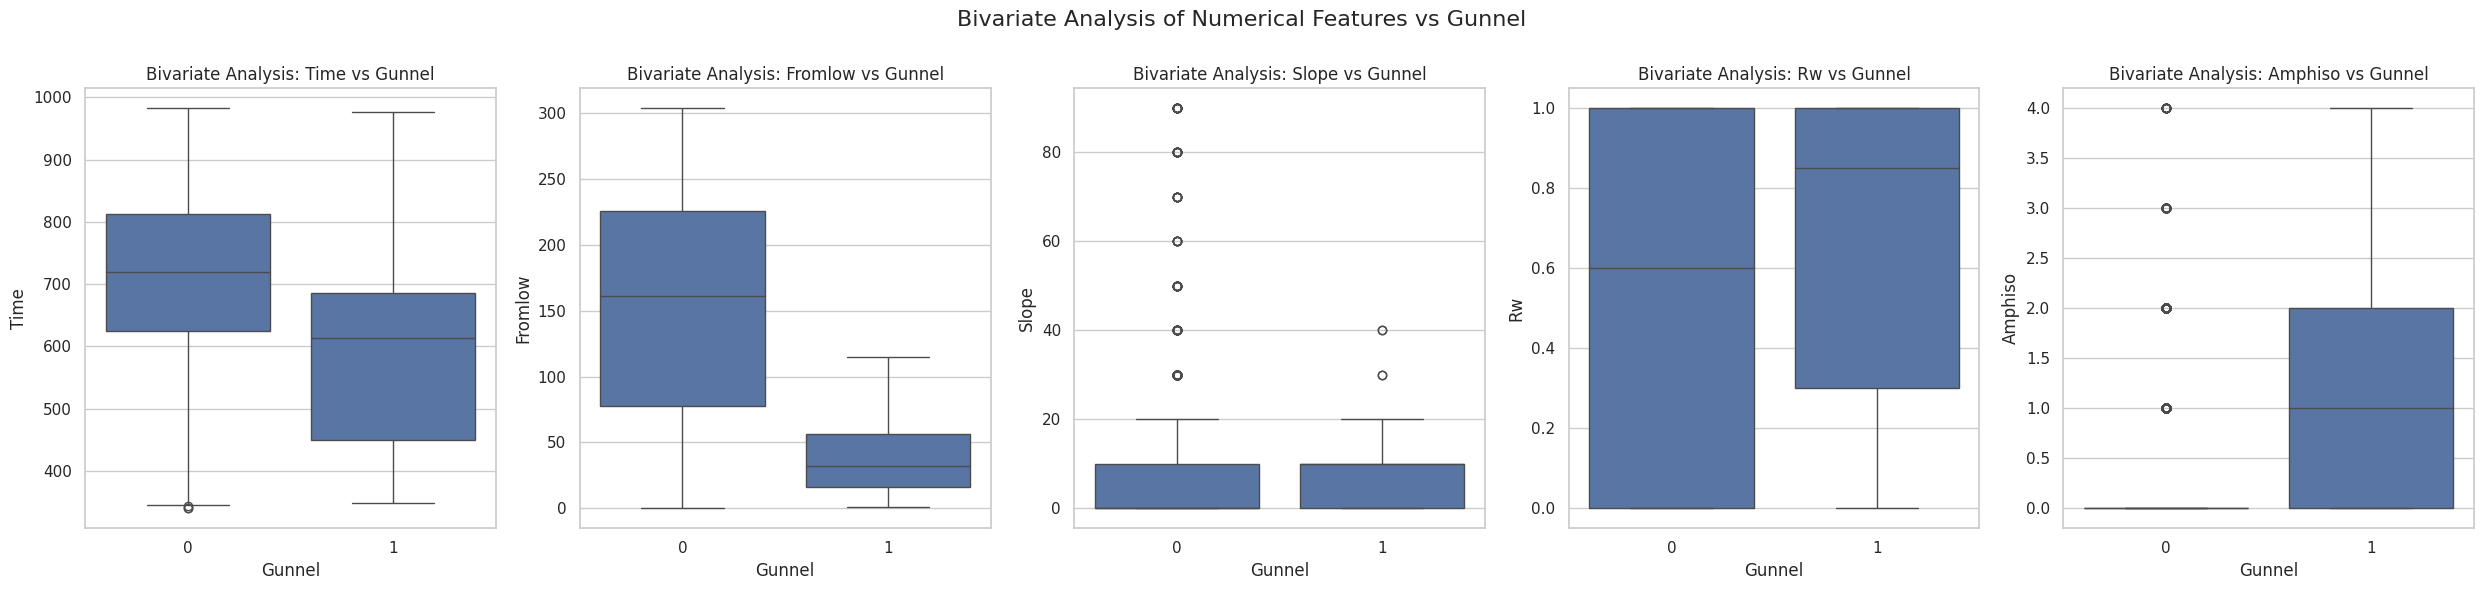

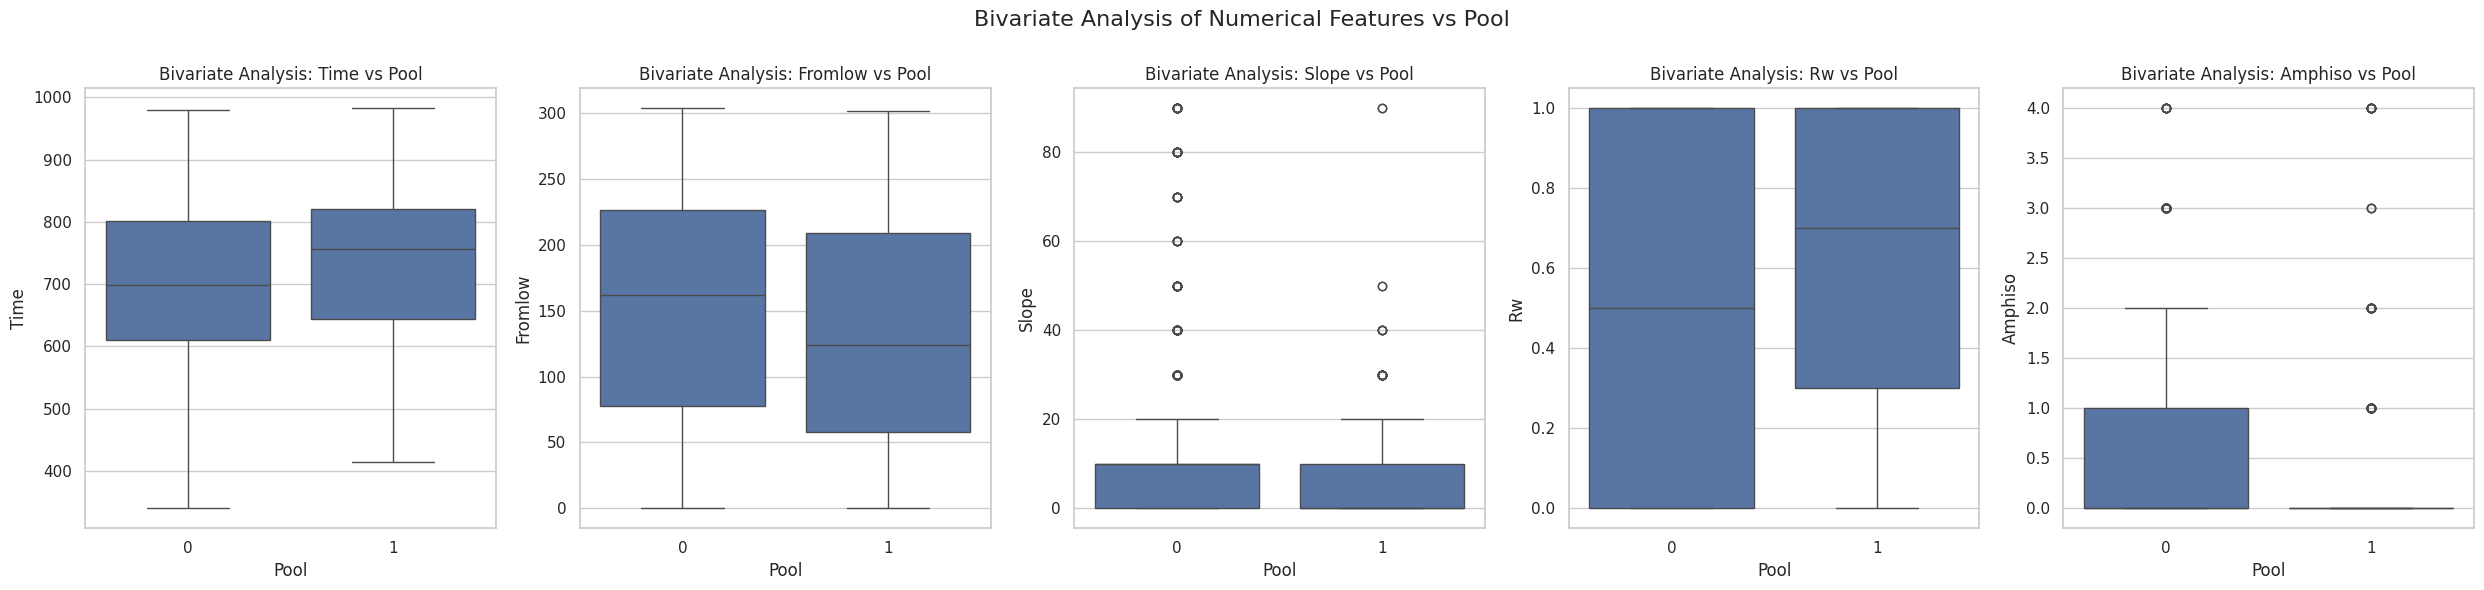

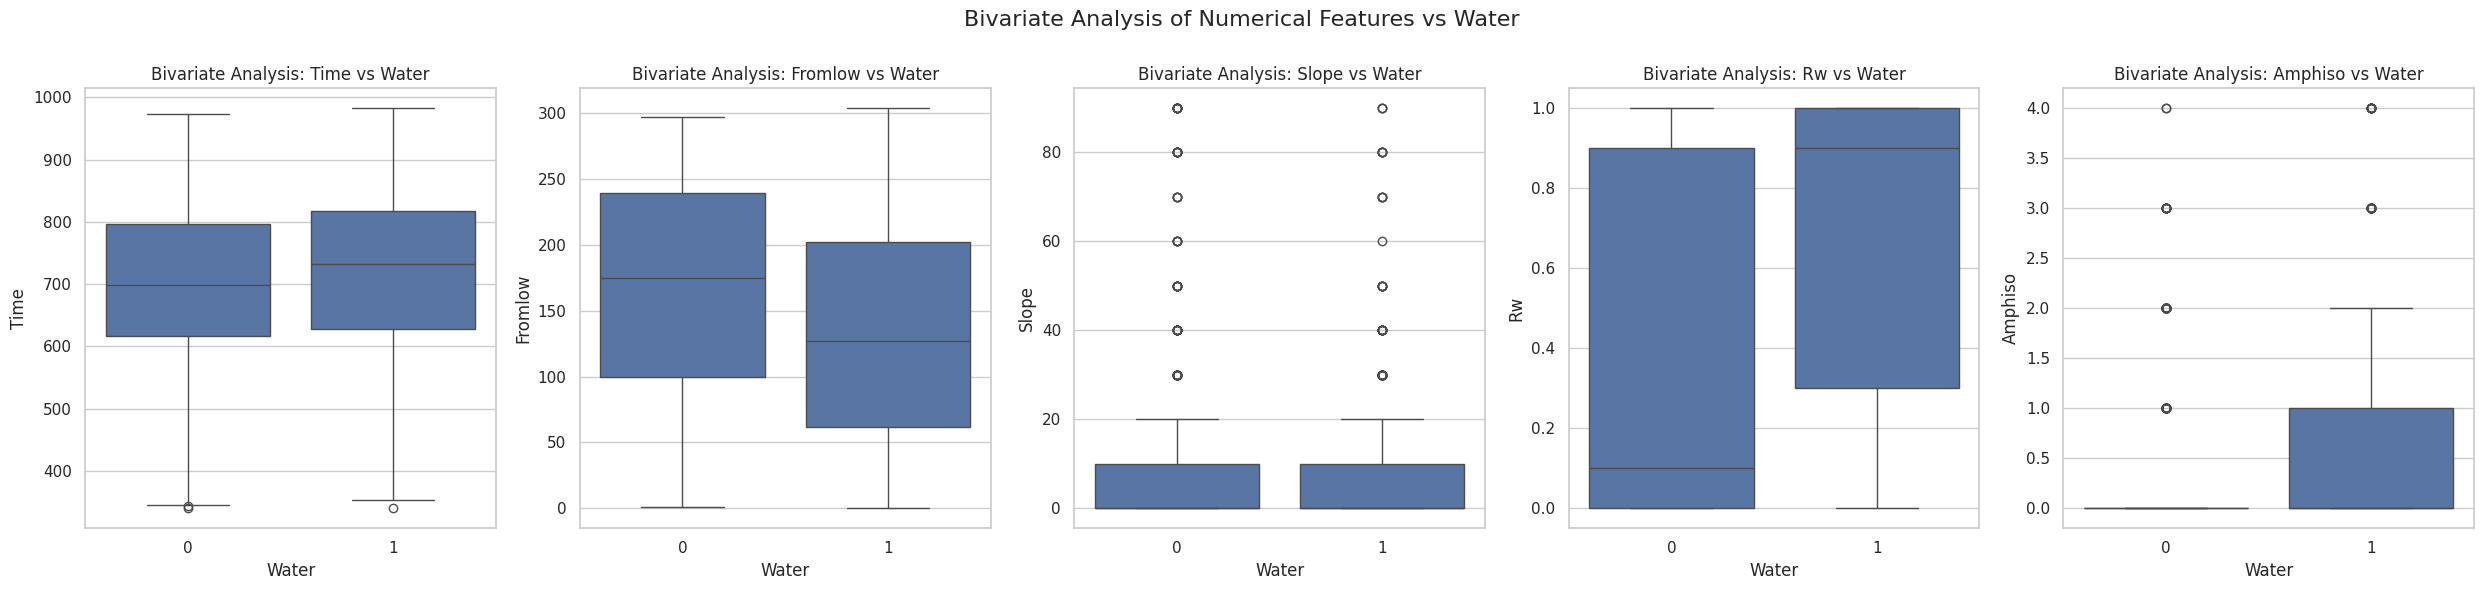

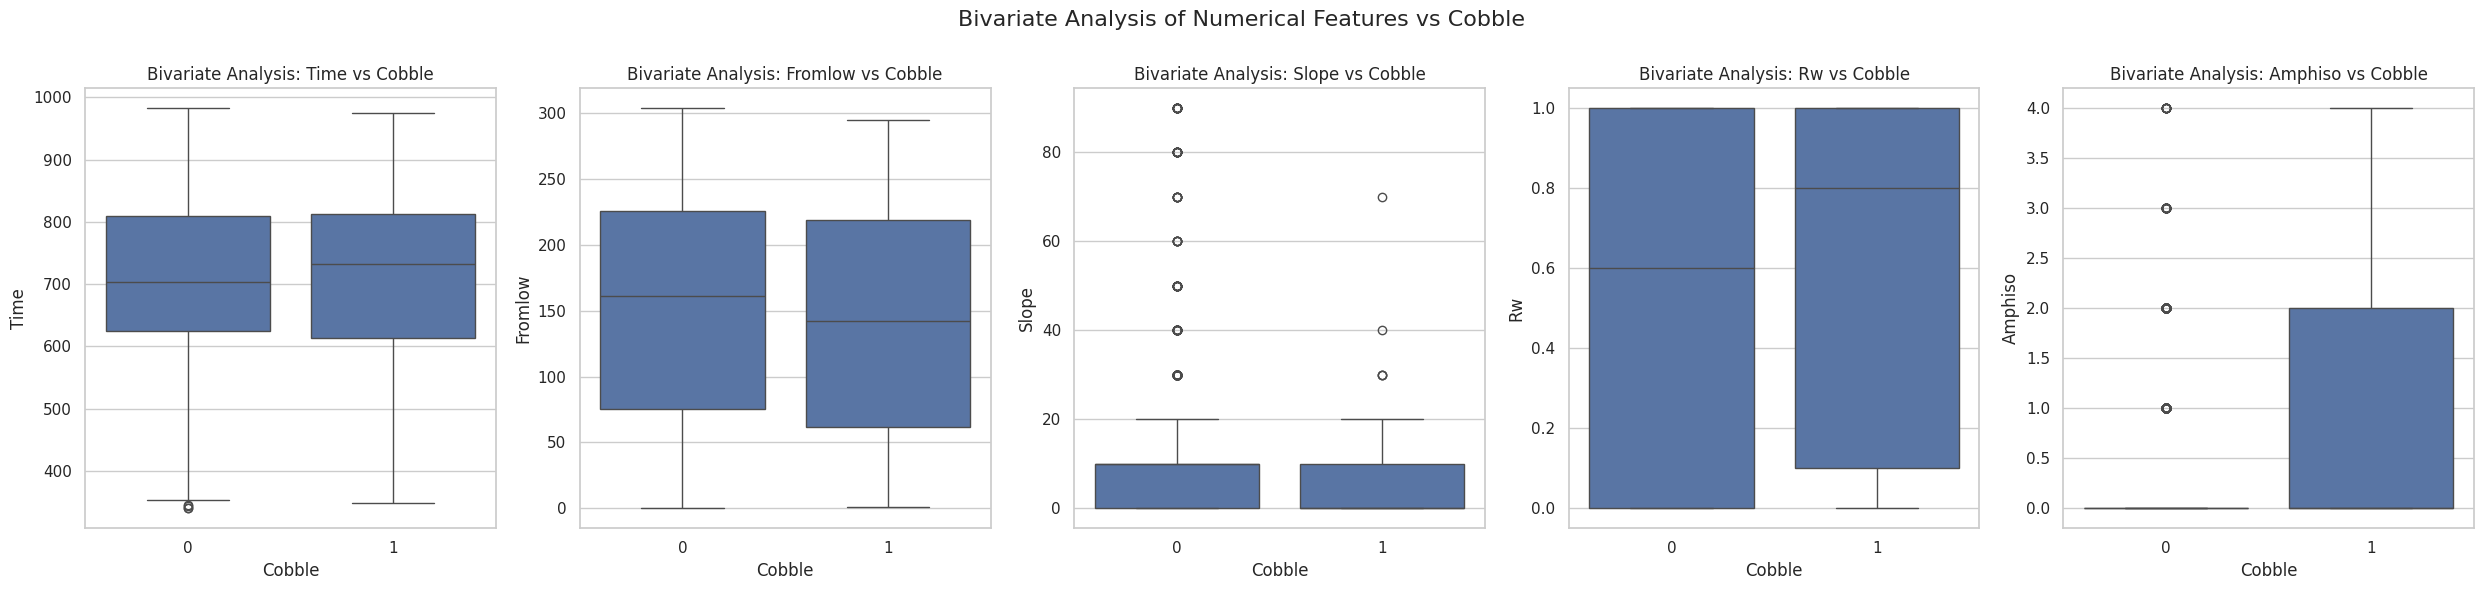

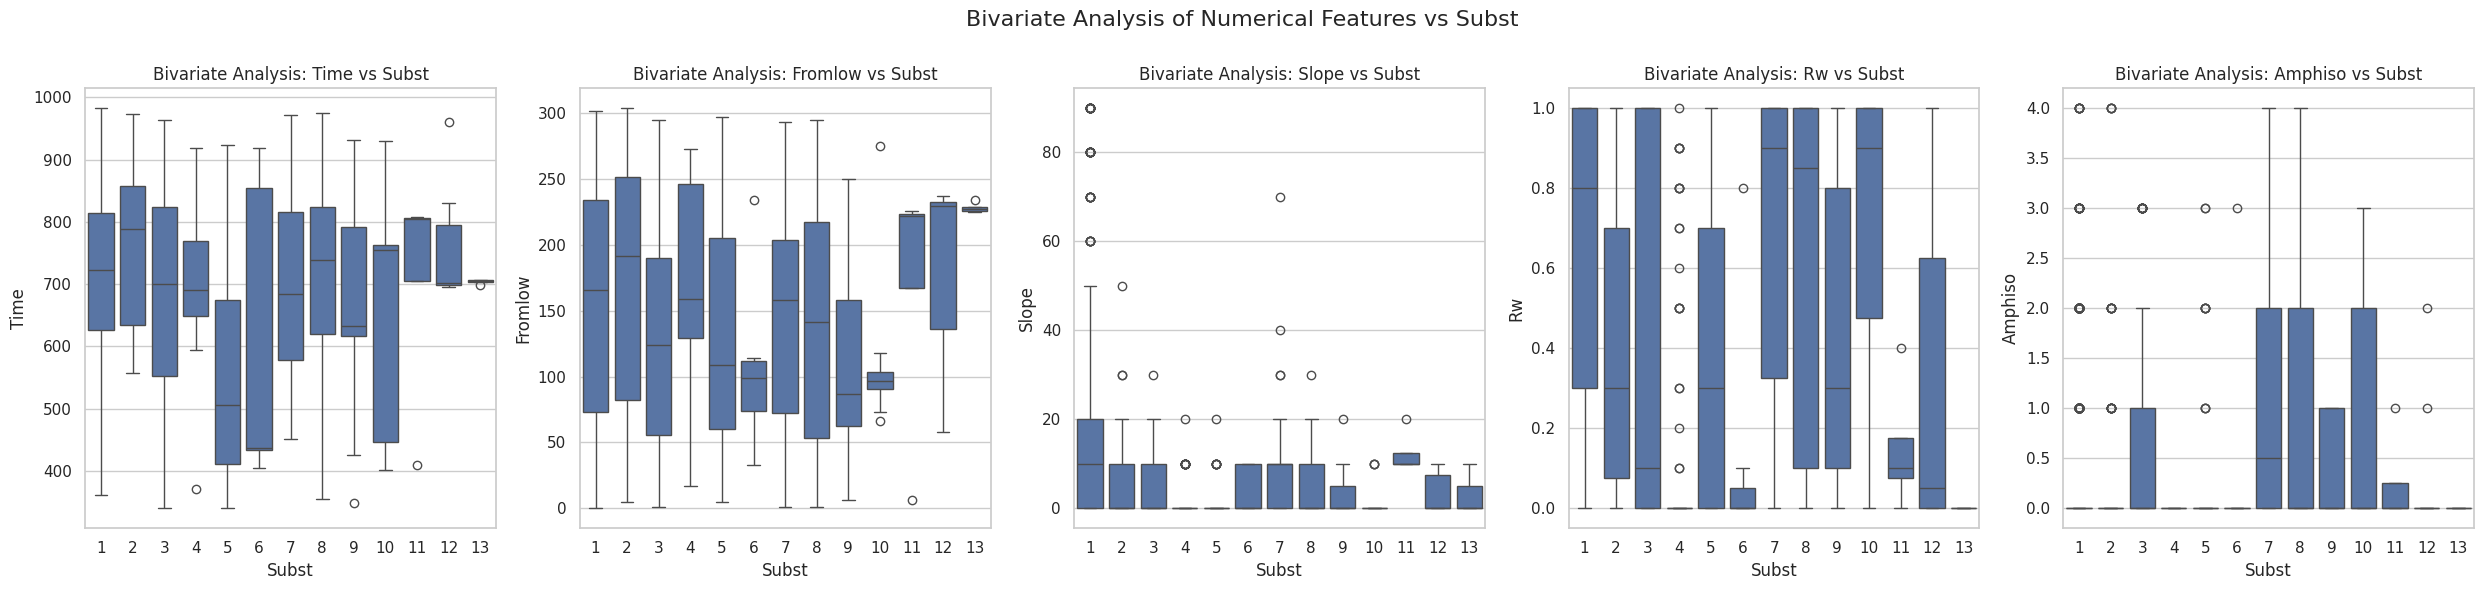

In [13]:
#Bivariate Analysis
numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = ['Gunnel', 'Pool', 'Water', 'Cobble', 'Subst']

# Create subplots for each numerical feature against categorical features
for cat_col in categorical_cols:
    num_plots = len(numerical_cols)

    # Create subplots
    fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(5 * num_plots, 6))

    for ax, num_col in zip(axes, numerical_cols):
        sns.boxplot(x=cat_col, y=num_col, data=df, ax=ax)
        ax.set_title(f'Bivariate Analysis: {num_col} vs {cat_col}')
        ax.set_ylabel(num_col)

    plt.suptitle(f'Bivariate Analysis of Numerical Features vs {cat_col}', fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

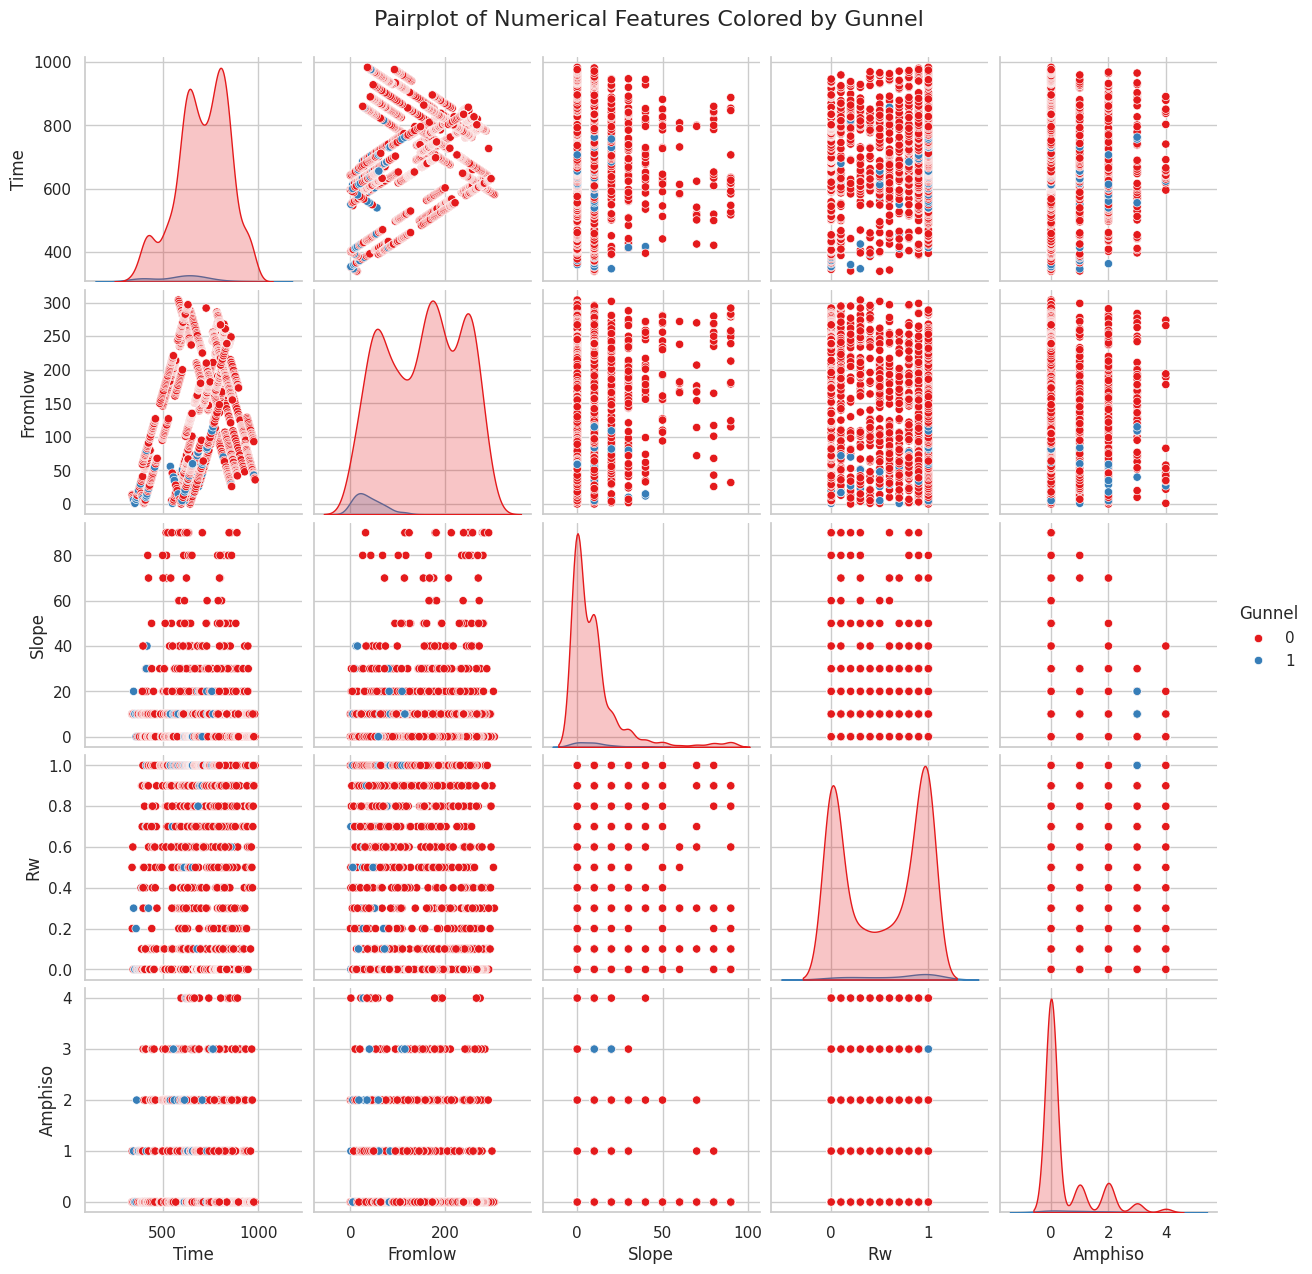

In [14]:
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Create pairplot colored by Gunnel
pairplot = sns.pairplot(df, vars=numerical_cols, hue='Gunnel', palette='Set1')
plt.suptitle('Pairplot of Numerical Features Colored by Gunnel', fontsize=16, y=1.02)
plt.show()

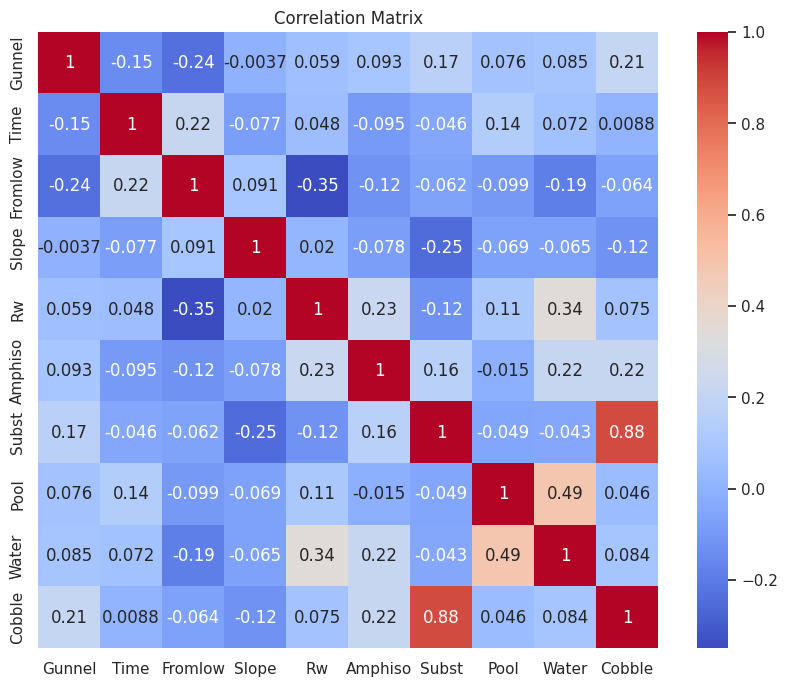

In [15]:
#Multivariate Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Time Series Analysis

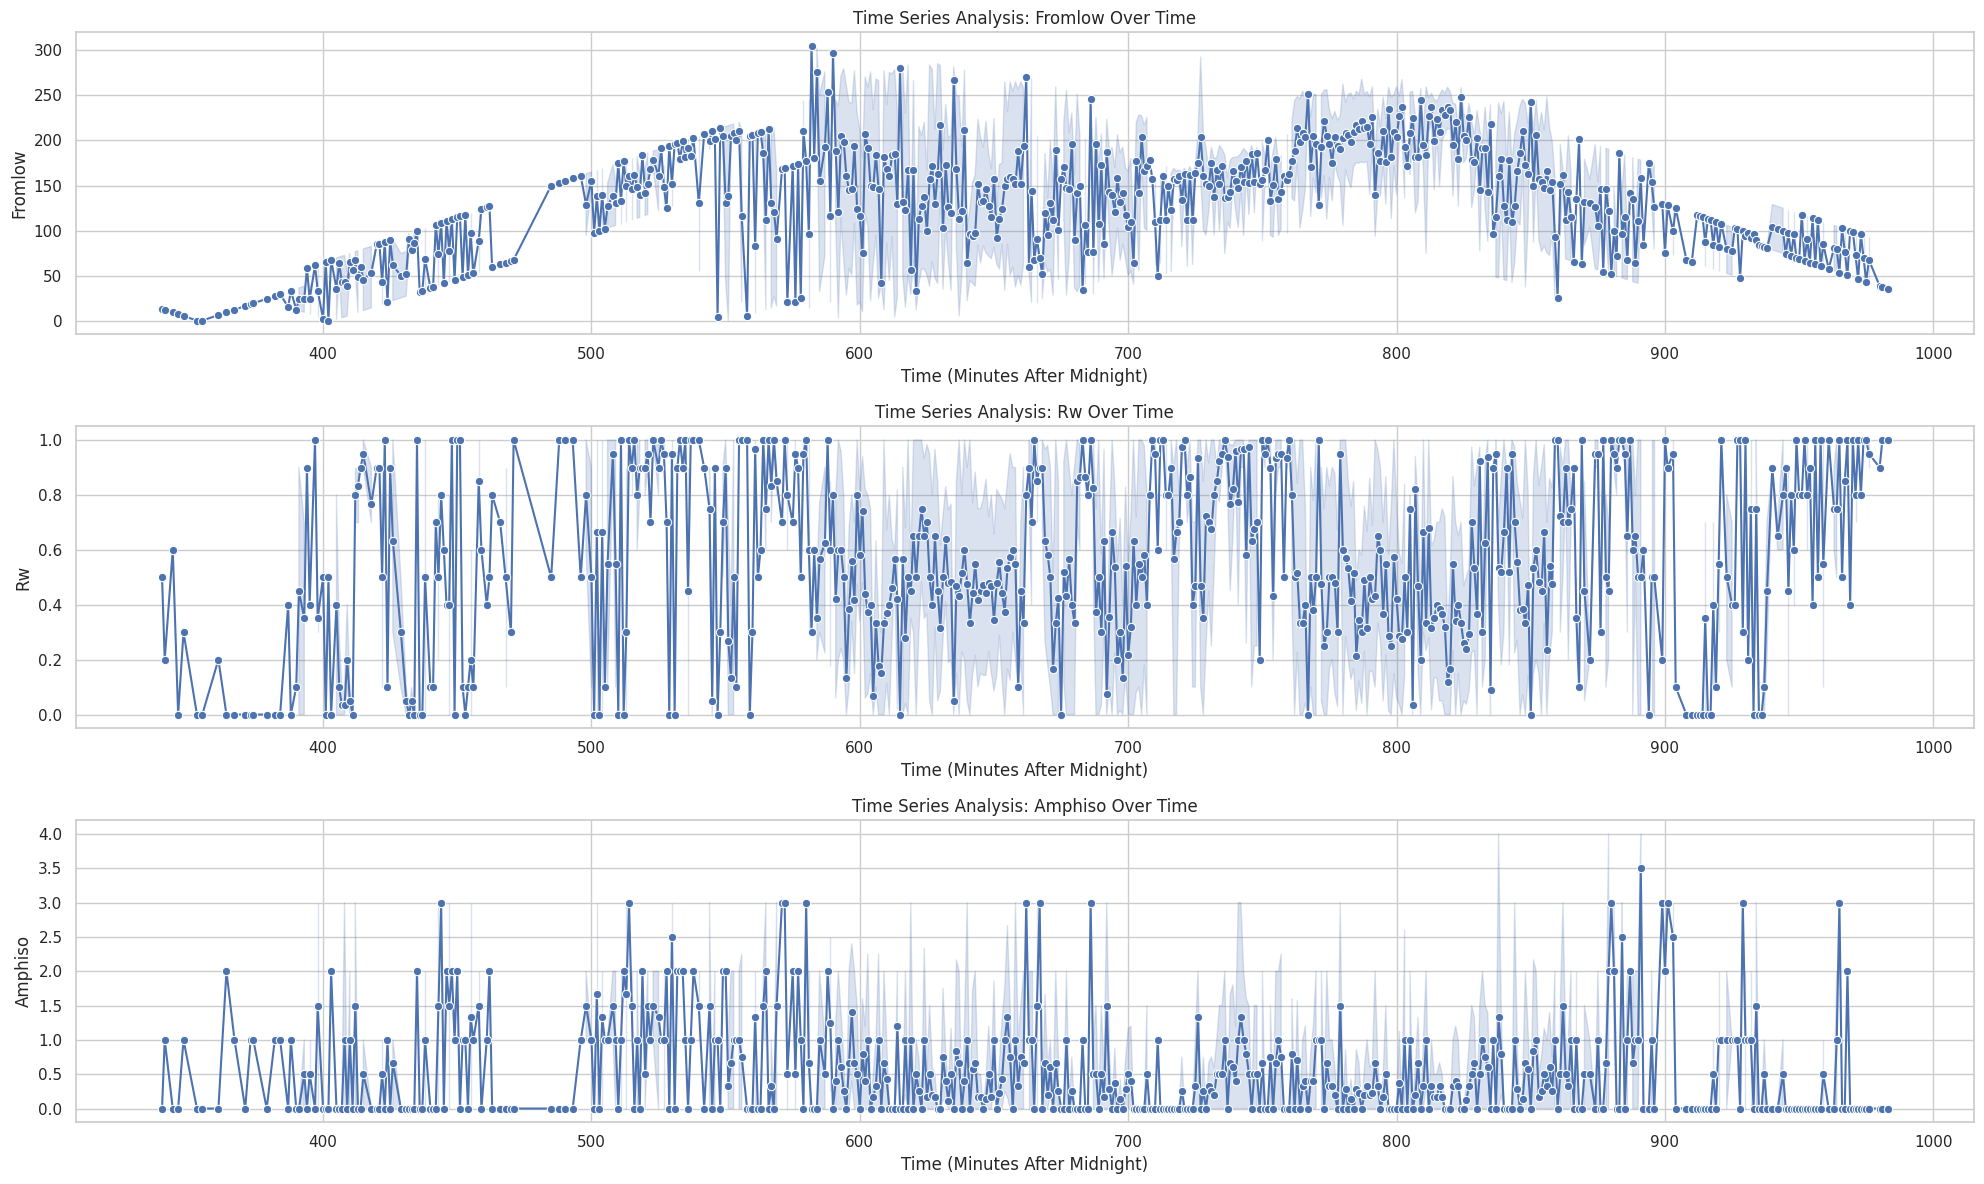

In [16]:
time_series_cols = ['Fromlow', 'Rw', 'Amphiso']

# Create subplots for each numerical feature over time
fig, axes = plt.subplots(nrows=len(time_series_cols), ncols=1, figsize=(20, 4 * len(time_series_cols)))

# Loop through each numerical column and create a line plot
for ax, col in zip(axes, time_series_cols):
    sns.lineplot(x='Time', y=col, data=df, marker='o', ax=ax)
    ax.set_title(f'Time Series Analysis: {col} Over Time')
    ax.set_xlabel('Time (Minutes After Midnight)')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

In [17]:
# 1D Statistical Data Analysis for Numerical Variables
numerical_vars = ["Time", "Fromlow", "Slope", "Rw", "Amphiso"]

In [18]:
# Measures of Central Tendency
for var in numerical_vars:
    print(f"Variable: {var}")
    x = df[var].dropna()
    print(f"Mean: {x.mean()}")
    print(f"Trimmed Mean (10%): {x.mean(skipna=True)}")  # Python doesn't have trimmed mean directly
    print(f"Median: {x.median()}")
    print("Quantiles (Deciles):")
    print(x.quantile(np.linspace(0, 1, 11)))
    print("Percentiles:")
    print(x.quantile([0.25, 0.5, 0.75]))
    print("\n")

Variable: Time
Mean: 705.2437185929648
Trimmed Mean (10%): 705.2437185929648
Median: 712.5
Quantiles (Deciles):
0.0    340.0
0.1    519.1
0.2    602.0
0.3    636.0
0.4    670.0
0.5    712.5
0.6    762.0
0.7    793.0
0.8    825.0
0.9    859.0
1.0    983.0
Name: Time, dtype: float64
Percentiles:
0.25    623.0
0.50    712.5
0.75    810.0
Name: Time, dtype: float64


Variable: Fromlow
Mean: 149.40891959798995
Trimmed Mean (10%): 149.40891959798995
Median: 158.0
Quantiles (Deciles):
0.0      0.0
0.1     38.1
0.2     59.0
0.3     89.0
0.4    125.0
0.5    158.0
0.6    179.0
0.7    204.0
0.8    239.0
0.9    257.0
1.0    304.0
Name: Fromlow, dtype: float64
Percentiles:
0.25     71.75
0.50    158.00
0.75    224.25
Name: Fromlow, dtype: float64


Variable: Slope
Mean: 9.503768844221106
Trimmed Mean (10%): 9.503768844221106
Median: 0.0
Quantiles (Deciles):
0.0     0.0
0.1     0.0
0.2     0.0
0.3     0.0
0.4     0.0
0.5     0.0
0.6    10.0
0.7    10.0
0.8    10.0
0.9    20.0
1.0    90.0
Name: Slope

In [19]:
# Measures of Dispersion
for var in numerical_vars:
    print(f"Variable: {var}")
    x = df[var].dropna()
    print(f"Range: {x.min()} - {x.max()}")
    print(f"Interquartile Range (IQR): {x.quantile(0.75) - x.quantile(0.25)}")
    print(f"Interdecile Range: {x.quantile(0.9) - x.quantile(0.1)}")
    print(f"Variance: {x.var()}")
    print(f"Standard Deviation: {x.std()}")
    print(f"Skewness: {skew(x)}")
    print(f"Kurtosis: {kurtosis(x)}")
    print("\n")

Variable: Time
Range: 340 - 983
Interquartile Range (IQR): 187.0
Interdecile Range: 339.9
Variance: 18456.210834183494
Standard Deviation: 135.85363754490893
Skewness: -0.39317346715796064
Kurtosis: -0.2867246999959092


Variable: Fromlow
Range: 0 - 304
Interquartile Range (IQR): 152.5
Interdecile Range: 218.89999999999998
Variance: 6833.060209517128
Standard Deviation: 82.66232642212006
Skewness: -0.06575132052869917
Kurtosis: -1.2267959323392654


Variable: Slope
Range: 0 - 90
Interquartile Range (IQR): 10.0
Interdecile Range: 20.0
Variance: 252.48772934438912
Standard Deviation: 15.889862470908586
Skewness: 2.9529822796978316
Kurtosis: 10.221231700571883


Variable: Rw
Range: 0.0 - 1.0
Interquartile Range (IQR): 1.0
Interdecile Range: 1.0
Variance: 0.1774752731286871
Standard Deviation: 0.4212781422394083
Skewness: -0.14367889413561127
Kurtosis: -1.7244713525684547


Variable: Amphiso
Range: 0 - 4
Interquartile Range (IQR): 1.0
Interdecile Range: 2.0
Variance: 0.8082710061937327
Sta

Frequency Distribution for Time:
 Time
827    12
825    10
632    10
788    10
648    10
       ..
860     1
662     1
374     1
373     1
683     1
Name: count, Length: 542, dtype: int64


Frequency Distribution for Fromlow:
 Fromlow
239    16
55     13
256    12
182    12
242    11
       ..
304     1
302     1
299     1
290     1
286     1
Name: count, Length: 299, dtype: int64


Frequency Distribution for Slope:
 Slope
0     814
10    493
20    127
30     66
40     28
50     18
90     18
80     14
70      8
60      6
Name: count, dtype: int64


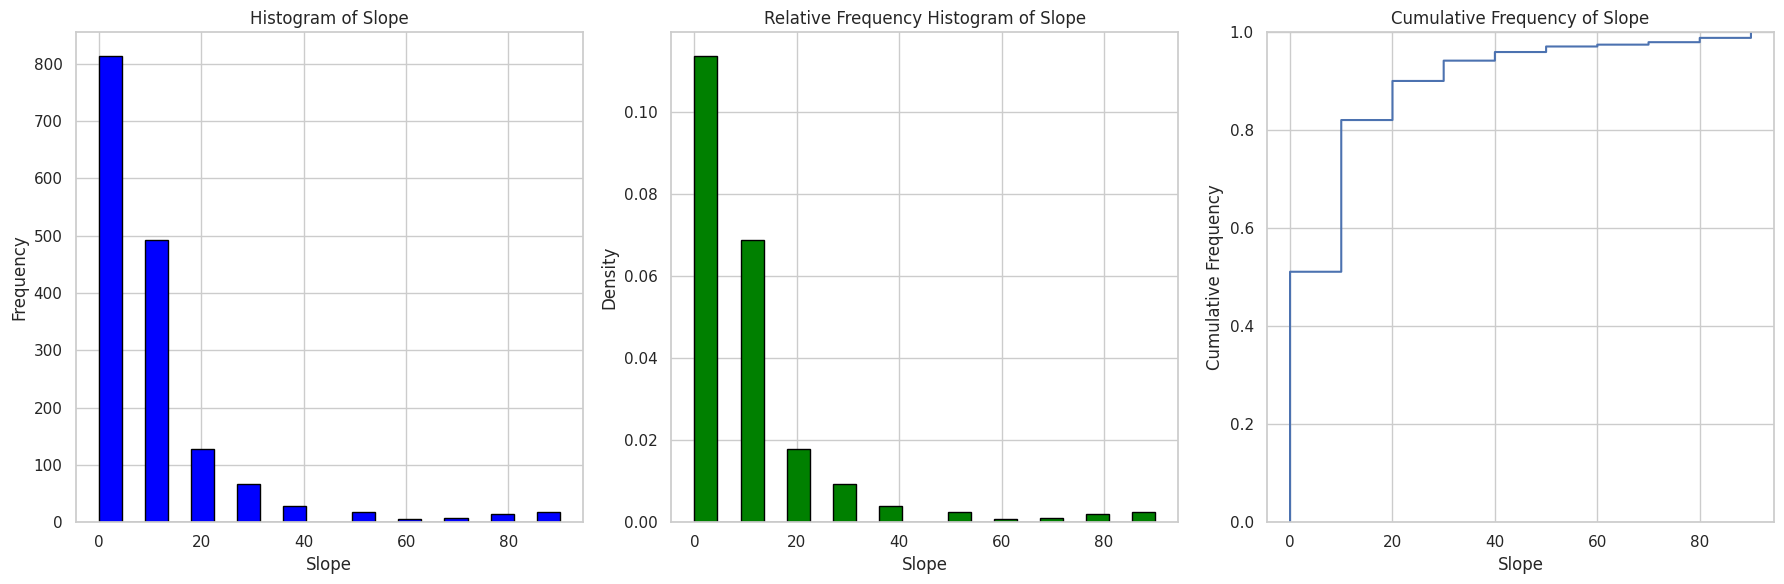

Frequency Distribution for Rw:
 Rw
0.0    435
1.0    432
0.9    194
0.1    112
0.8     82
0.3     71
0.7     67
0.5     59
0.6     54
0.2     44
0.4     42
Name: count, dtype: int64


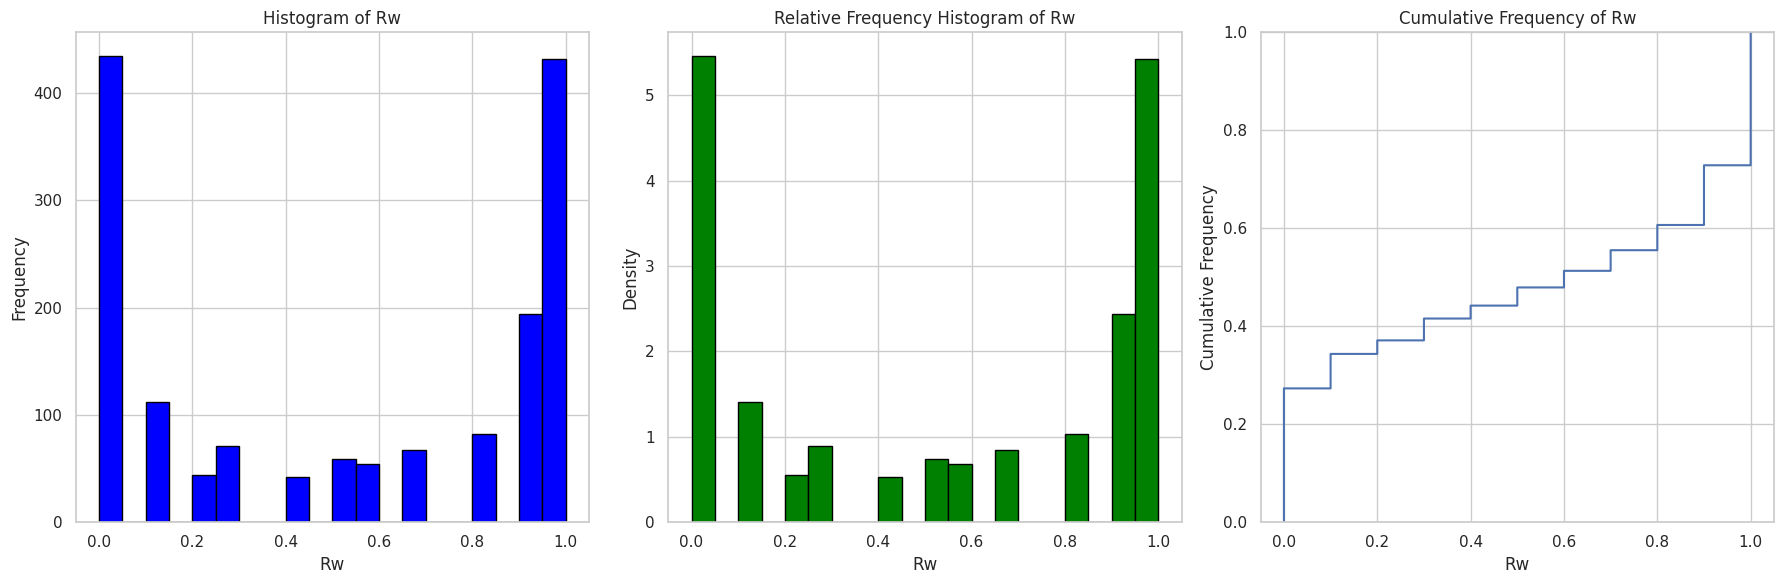

Frequency Distribution for Amphiso:
 Amphiso
0    1186
2     169
1     165
3      52
4      20
Name: count, dtype: int64


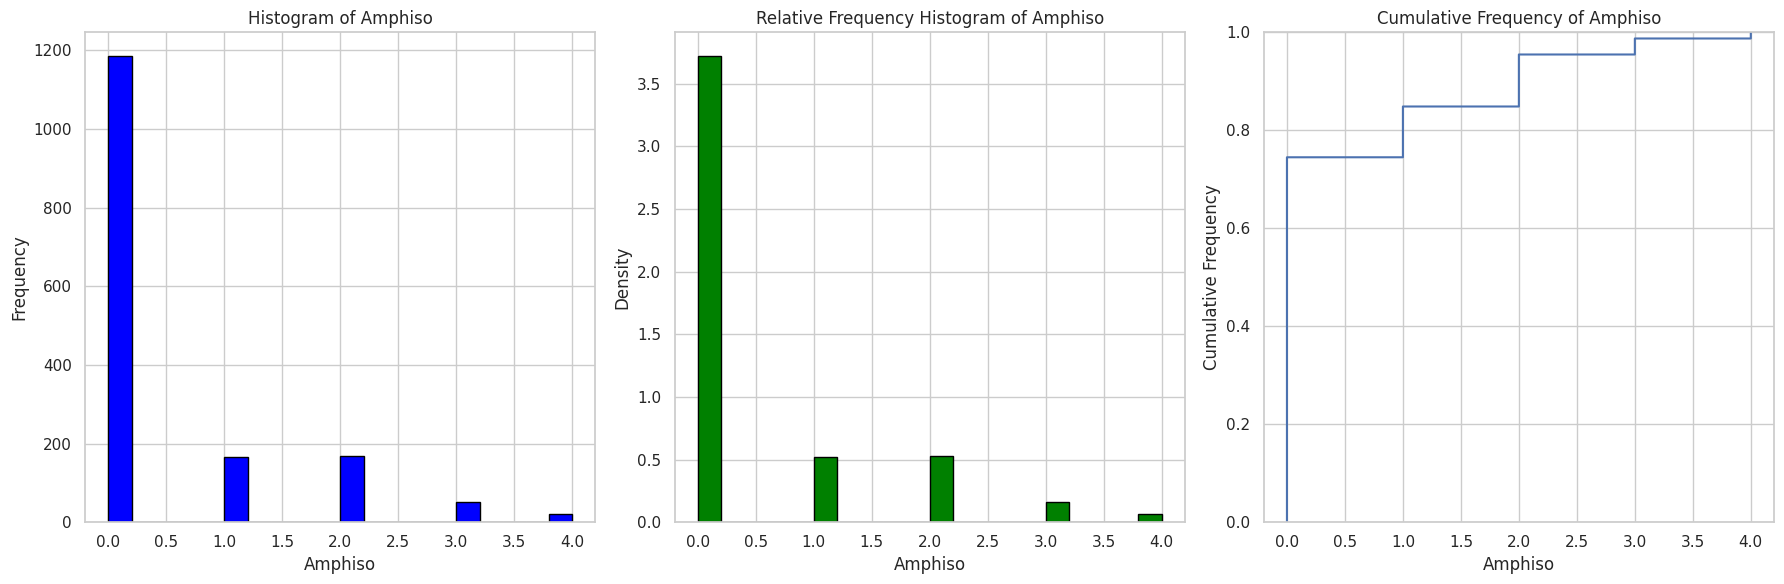

In [20]:
# Frequency Distribution and Plots for Numerical Variables
for var in numerical_vars:
    x = df[var].dropna()
    freq_table = x.value_counts()
    print(f"Frequency Distribution for {var}:\n", freq_table)
    # Create a figure with 1 row and 3 columns for subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Histogram
    axes[0].hist(x, bins=20, color='blue', edgecolor='black')
    axes[0].set_title(f"Histogram of {var}")
    axes[0].set_xlabel(var)
    axes[0].set_ylabel('Frequency')

    # Relative Frequency Histogram
    axes[1].hist(x, bins=20, density=True, color='green', edgecolor='black')
    axes[1].set_title(f"Relative Frequency Histogram of {var}")
    axes[1].set_xlabel(var)
    axes[1].set_ylabel('Density')

    # Cumulative Frequency Distribution
    sns.ecdfplot(x, ax=axes[2])
    axes[2].set_title(f"Cumulative Frequency of {var}")
    axes[2].set_xlabel(var)
    axes[2].set_ylabel('Cumulative Frequency')

    # Show the plots
    plt.tight_layout()
    plt.show()

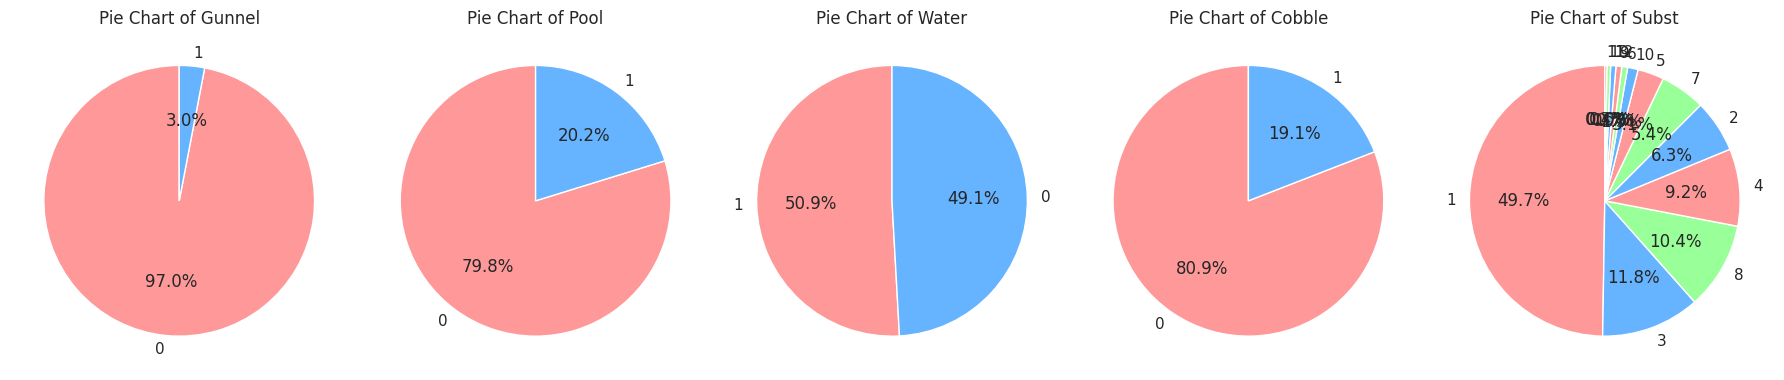

In [21]:
# Categorical Variables
categorical_vars = ['Gunnel', 'Pool', 'Water', 'Cobble','Subst']

# Pie Charts for Categorical Variables
fig, axes = plt.subplots(1, len(categorical_vars), figsize=(18, 6))  # 1 row, multiple columns

for i, var in enumerate(categorical_vars):
    x = df[var].dropna().value_counts()
    ax = axes[i]  # Access the appropriate axis for each subplot
    x.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'], ax=ax)
    ax.set_title(f"Pie Chart of {var}")
    ax.set_ylabel('')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

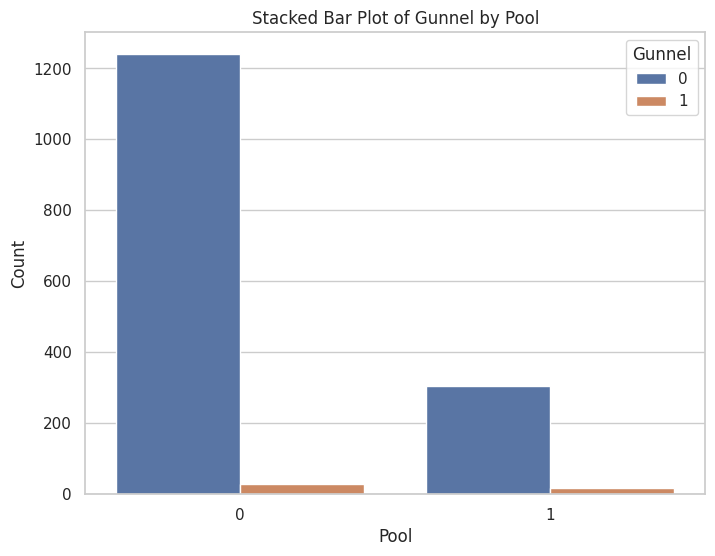

In [22]:
# Stacked Bar Plot for Categorical Variables
plt.figure(figsize=(8, 6))
sns.countplot(x='Pool', hue='Gunnel', data=df)
plt.title("Stacked Bar Plot of Gunnel by Pool")
plt.xlabel("Pool")
plt.ylabel("Count")
plt.show()

In [23]:
# Create 2-way contingency tables for all possible combinations of categorical variables
categorical_vars = ['Gunnel', 'Pool', 'Water', 'Cobble', 'Subst']

# 2-Way Contingency Tables for combinations of categorical variables
for i in range(len(categorical_vars)):
    for j in range(i+1, len(categorical_vars)):
        table = pd.crosstab(df[categorical_vars[i]], df[categorical_vars[j]])
        print(f"2-way Contingency Table for {categorical_vars[i]} and {categorical_vars[j]}:")
        print(table)
        print("\n")

2-way Contingency Table for Gunnel and Pool:
Pool       0    1
Gunnel           
0       1240  304
1         30   18


2-way Contingency Table for Gunnel and Water:
Water     0    1
Gunnel          
0       770  774
1        12   36


2-way Contingency Table for Gunnel and Cobble:
Cobble     0    1
Gunnel           
0       1272  272
1         16   32


2-way Contingency Table for Gunnel and Subst:
Subst     1   2    3    4   5   6   7    8  9  10  11  12  13
Gunnel                                                       
0       781  97  186  147  50  11  81  141  9  20   4  10   7
1        11   3    2    0   0   0   5   25  2   0   0   0   0


2-way Contingency Table for Pool and Water:
Water    0    1
Pool           
0      780  490
1        2  320


2-way Contingency Table for Pool and Cobble:
Cobble     0    1
Pool             
0       1039  231
1        249   73


2-way Contingency Table for Pool and Subst:
Subst    1   2    3    4   5   6   7    8  9  10  11  12  13
Pool          

In [24]:
# Create tables between numerical and categorical variables
numerical_vars = ["Time", "Fromlow", "Slope", "Rw", "Amphiso"]

for num_var in numerical_vars:
    for cat_var in categorical_vars:
        table = pd.crosstab(pd.cut(df[num_var], bins=4), df[cat_var])
        print(f"Contingency Table between {num_var} and {cat_var}:")
        print(table)
        print("\n")

Contingency Table between Time and Gunnel:
Gunnel               0   1
Time                      
(339.357, 500.75]  116  13
(500.75, 661.5]    466  21
(661.5, 822.25]    632  12
(822.25, 983.0]    330   2


Contingency Table between Time and Pool:
Pool                 0    1
Time                       
(339.357, 500.75]  121    8
(500.75, 661.5]    400   87
(661.5, 822.25]    495  149
(822.25, 983.0]    254   78


Contingency Table between Time and Water:
Water                0    1
Time                       
(339.357, 500.75]   64   65
(500.75, 661.5]    253  234
(661.5, 822.25]    320  324
(822.25, 983.0]    145  187


Contingency Table between Time and Cobble:
Cobble               0    1
Time                       
(339.357, 500.75]  105   24
(500.75, 661.5]    402   85
(661.5, 822.25]    515  129
(822.25, 983.0]    266   66


Contingency Table between Time and Subst:
Subst                1   2   3   4   5  6   7   8  9  10  11  12  13
Time                                          

In [25]:
# Create a 3-way contingency table
contingency_3way = pd.crosstab([df['Gunnel'], df['Pool']], df['Water'])
print("3-way Contingency Table:")
contingency_3way

3-way Contingency Table:


Water          0    1
Gunnel Pool          
0      0     769  471
       1       1  303
1      0      11   19
       1       1   17

In [26]:
# Row profiles (proportions over rows)
table = pd.crosstab(df['Gunnel'], df['Pool'])
row_profiles = table.div(table.sum(axis=1), axis=0)
print("Row Profiles (Proportions over rows):")
row_profiles

Row Profiles (Proportions over rows):


Pool           0         1
Gunnel                    
0       0.803109  0.196891
1       0.625000  0.375000

In [27]:
column_profiles = table.div(table.sum(axis=0), axis=1)
print("Column Profiles (Proportions over columns):")
column_profiles

Column Profiles (Proportions over columns):


Pool           0         1
Gunnel                    
0       0.976378  0.944099
1       0.023622  0.055901

In [28]:
# Relative frequencies (overall proportions)
total = table.sum().sum()
relative_frequencies = table / total
print("Relative Frequencies (Overall proportions):")
relative_frequencies

Relative Frequencies (Overall proportions):


Pool           0         1
Gunnel                    
0       0.778894  0.190955
1       0.018844  0.011307

In [29]:
from scipy.stats import chi2_contingency
# Chi-square test
chi2, p, dof, expected = chi2_contingency(table)
print("Chi-square Test Results:")
print(f"Chi2 Statistic: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")
print("\n")

Chi-square Test Results:
Chi2 Statistic: 8.081992675279187, p-value: 0.004470725894133612, Degrees of Freedom: 1
Expected Frequencies:
[[1231.70854271  312.29145729]
 [  38.29145729    9.70854271]]




<ipython-input-30-91d3205269c5>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Time', y='Fromlow', data=df, palette='Set1')


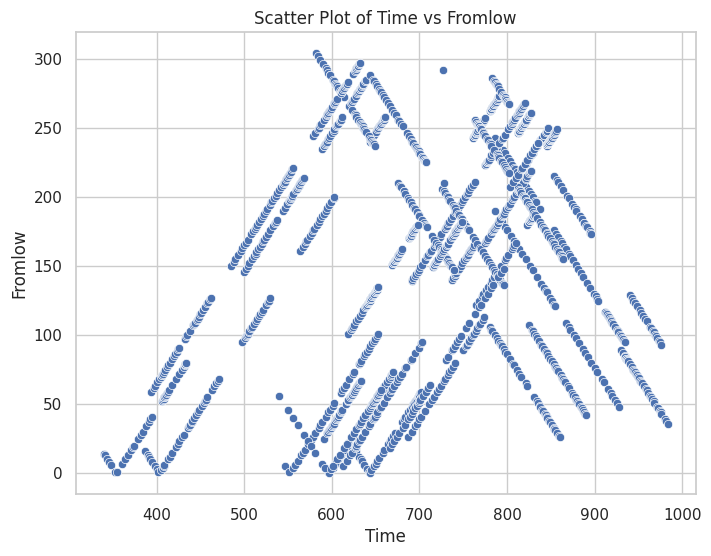

In [30]:
# Scatter plot for two variables
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Time', y='Fromlow', data=df, palette='Set1')
plt.title('Scatter Plot of Time vs Fromlow')
plt.xlabel('Time')
plt.ylabel('Fromlow')
plt.show()

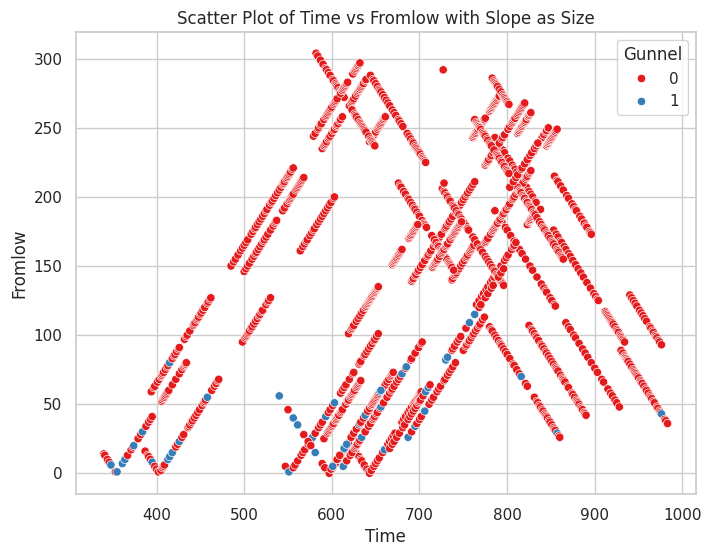

In [31]:
# Scatter plot for three variables (with hue)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Time', y='Fromlow', data=df, hue='Gunnel', palette='Set1', sizes=(20, 200))
plt.title('Scatter Plot of Time vs Fromlow with Slope as Size')
plt.xlabel('Time')
plt.ylabel('Fromlow')
plt.show()

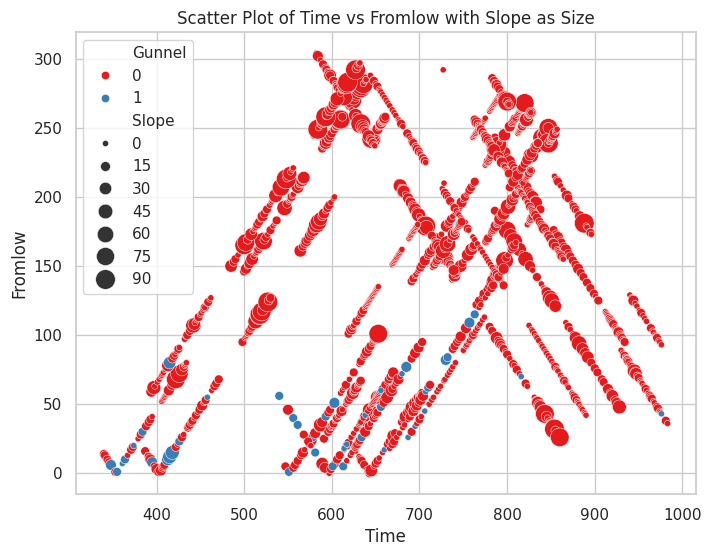

In [32]:
# Scatter plot for four variables (with hue and size)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Time', y='Fromlow', data=df, hue='Gunnel', size='Slope', palette='Set1', sizes=(20, 200))
plt.title('Scatter Plot of Time vs Fromlow with Slope as Size')
plt.xlabel('Time')
plt.ylabel('Fromlow')
plt.show()

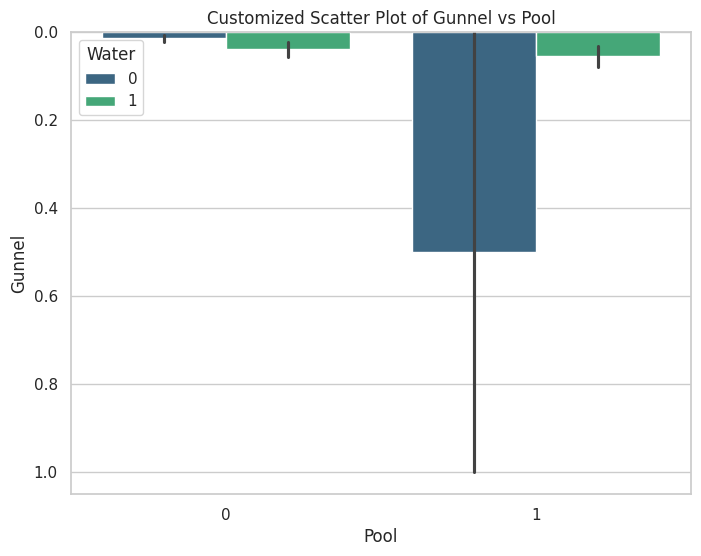

In [33]:
# Customize scatter plot for contingency table
plt.figure(figsize=(8, 6))
sns.barplot(x='Pool', y='Gunnel', data=df, hue='Water', palette='viridis')
plt.title('Customized Scatter Plot of Gunnel vs Pool')
plt.xlabel('Pool')
plt.ylabel('Gunnel')
plt.show()

In [34]:
# Display a 3D bar plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

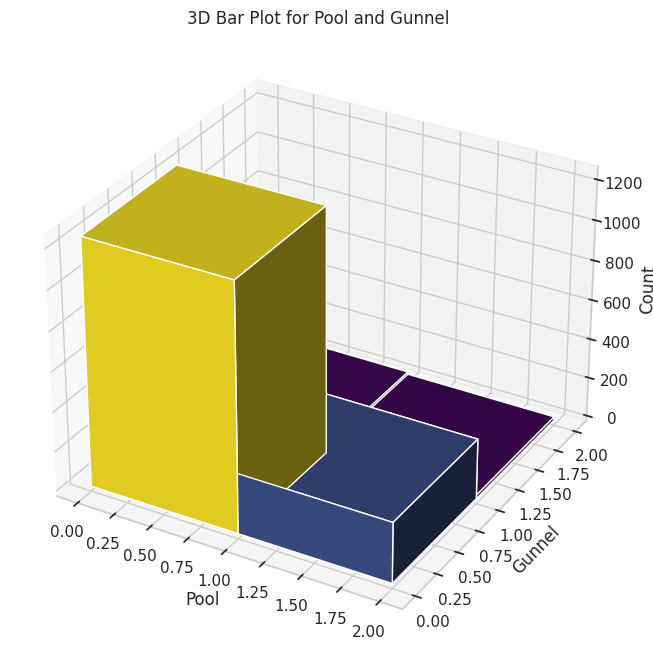

In [35]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Create a 3D bar plot with 'Pool', 'Gunnel', and 'Water' data
pool_categories = df['Pool'].unique()
gunnel_categories = df['Gunnel'].unique()
water_categories = df['Water'].unique()

# Create a meshgrid for 3D plot
x, y = np.meshgrid(pool_categories, gunnel_categories)
z = np.zeros_like(x)

# Create bar plot for 3D visualization
for i, pool in enumerate(pool_categories):
    for j, gunnel in enumerate(gunnel_categories):
        z[j, i] = len(df[(df['Pool'] == pool) & (df['Gunnel'] == gunnel)])

ax.bar3d(x.flatten(), y.flatten(), np.zeros_like(z.flatten()), 1, 1, z.flatten(), color=cm.viridis(z.flatten() / max(z.flatten())))

ax.set_xlabel('Pool')
ax.set_ylabel('Gunnel')
ax.set_zlabel('Count')
ax.set_title('3D Bar Plot for Pool and Gunnel')

plt.show()

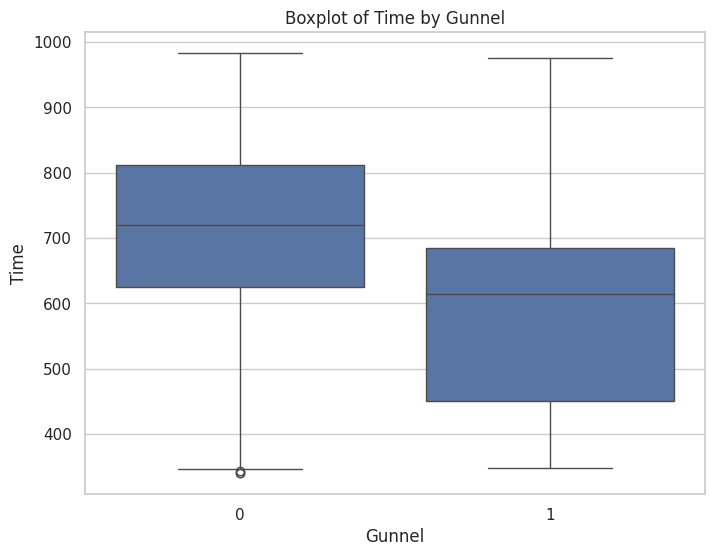

In [36]:
# Display a 2D boxplot (one variable as categorical)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gunnel', y='Time', data=df)
plt.title('Boxplot of Time by Gunnel')
plt.xlabel('Gunnel')
plt.ylabel('Time')
plt.show()

Hierarchical Clustering (Euclidean, Manhattan, Minkowski)

In [37]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [38]:
numerical_columns = ['Time', 'Fromlow', 'Slope', 'Rw', 'Amphiso']
data = df[numerical_columns].dropna()

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.pairwise import pairwise_distances

In [40]:
# Hierarchical Clustering (Euclidean)
Z_euclidean = linkage(data_scaled, method='ward', metric='euclidean')

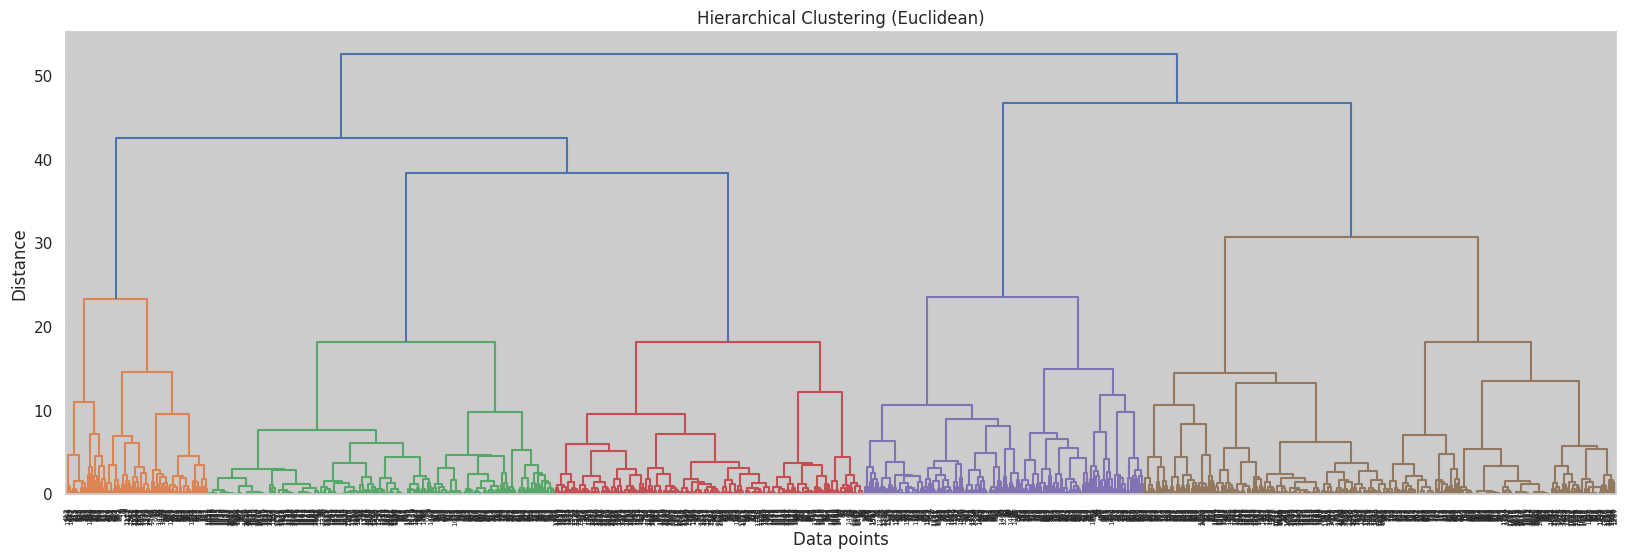

In [41]:
# Dendrogram
plt.figure(figsize=(20, 6))
dendrogram(Z_euclidean)
plt.title('Hierarchical Clustering (Euclidean)')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

In [42]:
# Hierarchical Clustering using Manhattan distance
Z_manhattan = linkage(data_scaled, method='complete', metric='cityblock')  # 'complete' method for Manhattan distance

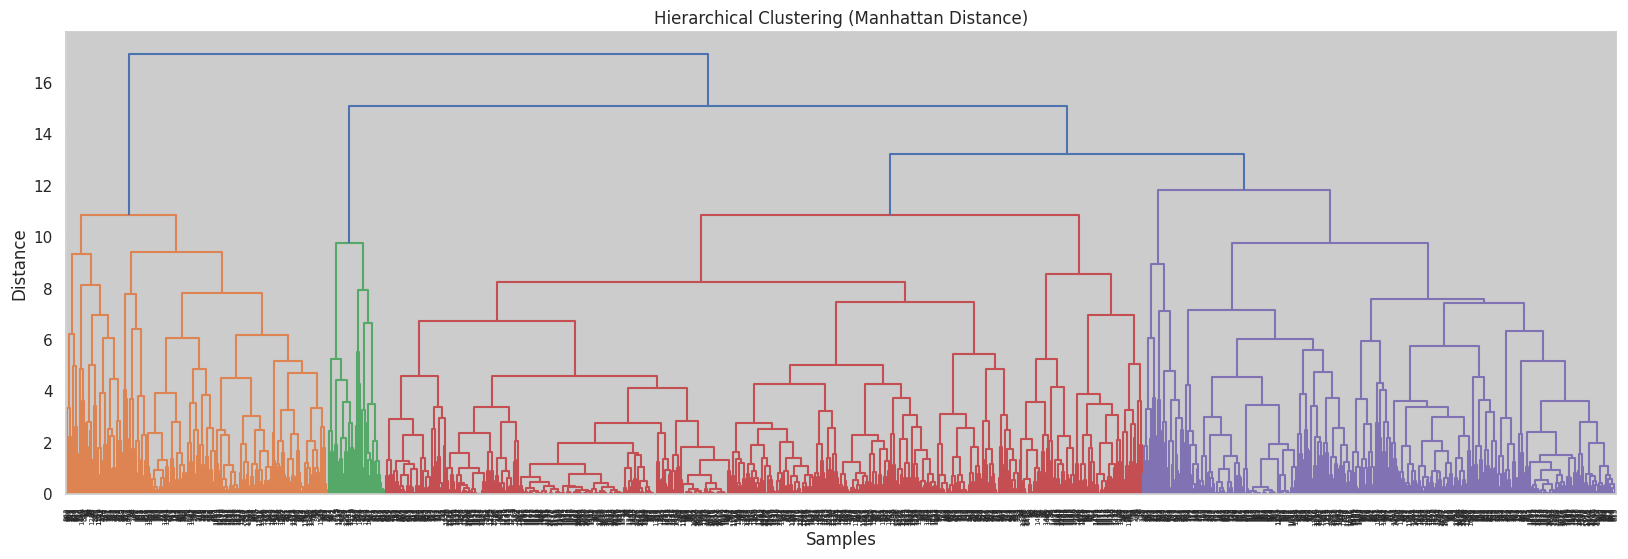

In [43]:
# Dendrogram for Manhattan distance
plt.figure(figsize=(20, 6))
dendrogram(Z_manhattan)
plt.title('Hierarchical Clustering (Manhattan Distance)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [44]:
# Hierarchical Clustering (Minkowski)
Z_minkowski = linkage(data_scaled, method='complete', metric='minkowski')

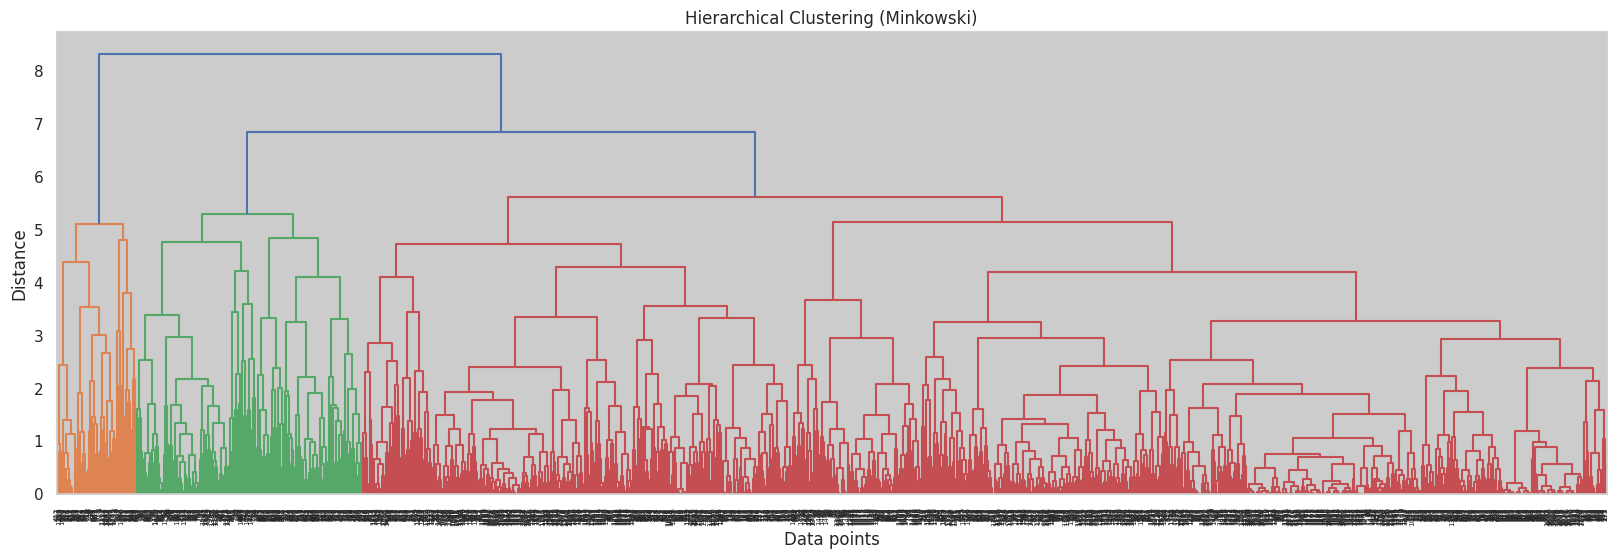

In [45]:
# Dendrogram
plt.figure(figsize=(20, 6))
dendrogram(Z_minkowski)
plt.title('Hierarchical Clustering (Minkowski)')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

K-Means Custering

In [46]:
# Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

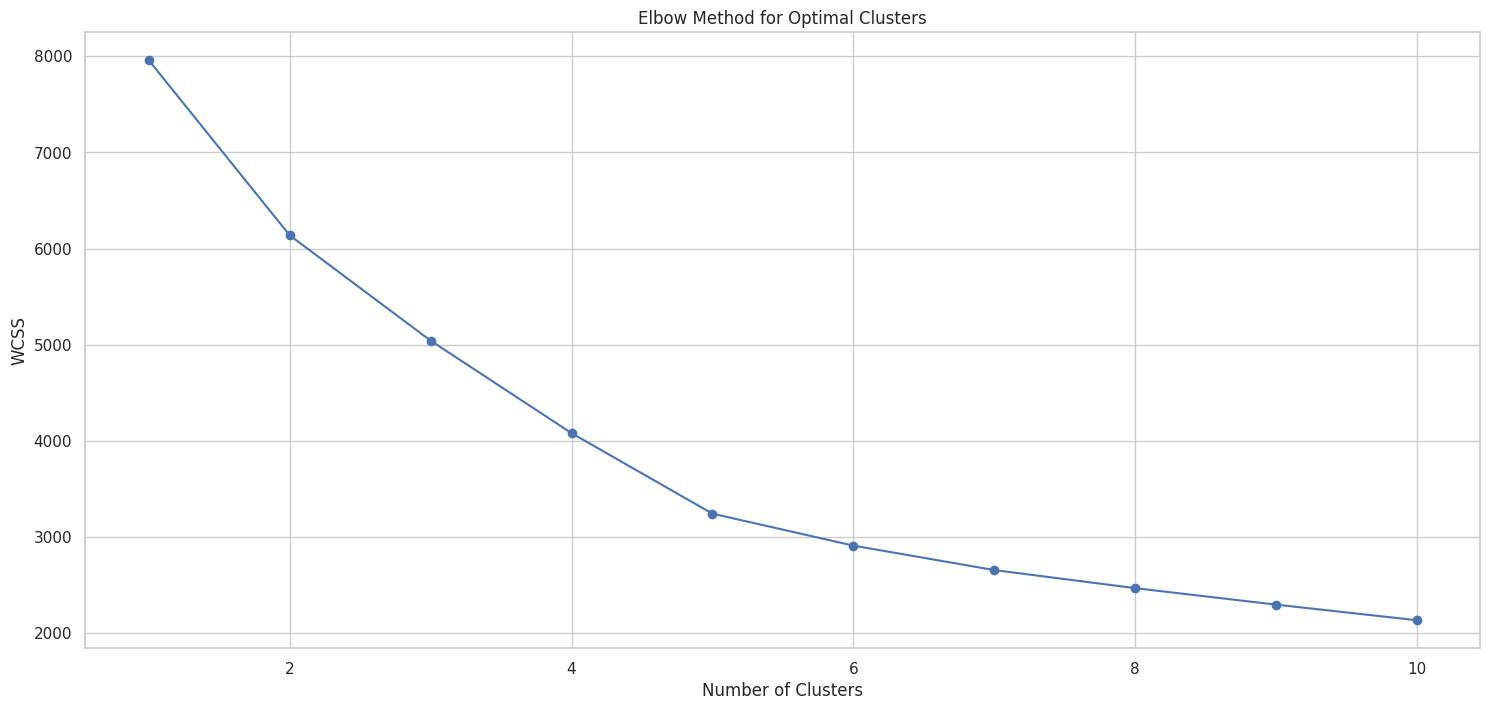

In [47]:
# Plot the Elbow Graph
plt.figure(figsize=(18, 8))
plt.plot(range(1, 11), wcss, marker='o', color='b')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [48]:
# From the plot, selecting the optimal number of clusters
optimal_clusters = 5

# Train K-Means model
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_scaled)

KMeans(n_clusters=5, n_init=10, random_state=0)

In [49]:
# Add the cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

Now, we cannot directly visualize the clusters as this is not a 2D data. Hence, lets perform PCA to be able to visualize the clusters effectively.

In [50]:
from sklearn.decomposition import PCA
# Apply PCA for dimensionality reduction (reduce to 2 components)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled)

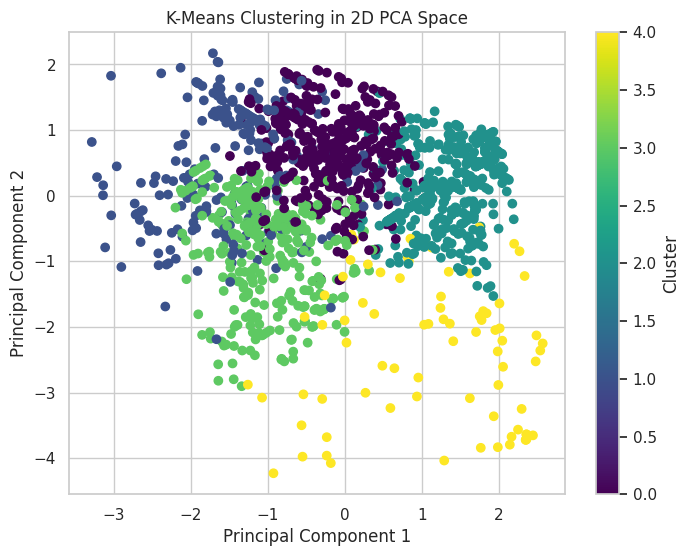

In [51]:
# Plot the K-Means clusters in the 2D PCA space
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering in 2D PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

Using the numerical columns of the data:[Time, Fromlow, Slope, Amphiso] to predict Rw (percentage cover in quadrat of rockweed/algae/plants).

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
# Select numerical columns for regression
numerical_vars = ['Time', 'Fromlow', 'Slope', 'Rw', 'Amphiso']

In [54]:
X = data[numerical_vars]
y = data['Rw']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [57]:
# Predict on the test set
y_pred = model.predict(X_test)

In [58]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [59]:
# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Display model coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Mean Squared Error (MSE): 1.2022469679202698e-31
R-squared (R2): 1.0
Model Coefficients: [ 2.82944451e-19 -2.60208521e-18  1.71032893e-17  1.00000000e+00
 -1.65622893e-16]
Model Intercept: 2.220446049250313e-16


As we can see, the error in prediction is almost close to 0 which means that the model is able to predict the target variable very well.

An R² of 1.0 indicates that the model explains 100% of the variance in the target variable (Rw) using the predictors.

The coefficient for one of the predictors is 1.0, suggesting a very strong (likely perfect) linear relationship.